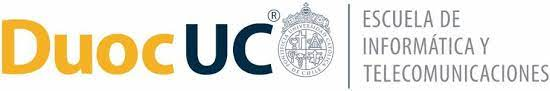

# Informe Técnico - Examen Transversal: Caso EducaDL


Integrantes: Gustavo Acuña, Eduardo Poblete


## Parte 1. Contextualización del proyecto y de los datos.

Describir en este apartado, el contexto del problema planteado. 
Analizar el dataset MNIST apoyándose de documentación complementaria además del contexto del caso.

Identificar el impacto socio-cultural que genera tanto el Machine Learning cono la Inteligencia Artificial. Y en particular, este proyecto y a quienes beneficia, pro y contras, etc.

Indicar en qué consiste la solución propuesta en todos sus ámbitos.

#######################

La empresa conocida como EducaDL, es una empresa dedicada al desarrollo de software educativo para niveles de enseñanza prebásica y básica en Chile, cuenta con una destacada trayectoria en el área de incorporación de proyectos innovadores en distintos establecimientos del país, teniendo en su lista de clientes a grandes organizaciones con miles de estudiantes.

Bajo este contexto, un establecimiento ubicado en la zona central de Chile, los cuales están categorizados como "clientes importantes" de EducaDL, han manifestado la idea de incorporar nuevas tecnologías al su proceso de enseñanza, utilizando como argumento a favor la facilidad y motivación que poseen los niños hoy en día frente a estas nuevas tecnologías.

De este modo, surgió dentro del equipo de Unidad Técnica en apoyo con el área de Desarrollo Tecnológico, la idea de contratar a un experto en aprendizaje automático, el cual pueda generar un modelo experimental el cual sea capaz de apoyar el aprendizaje de los números a niños de prebásica, siendo este un proyecto pionero dentro del ámbito educativo, con el objetivo de dar respuesta a uno de sus clientes más importantes.

#######################

EducaDL se ha planteado como un nuevo proyecto, implementar redes neuronales para poder analizar las evaluaciones de sus docentes, basándose en los comentarios que realizan los apoderados de la institución. Para ello, y como aún no se tiene implementado este nuevo sistema de evaluación, la institución sugiere generar el entrenamiento de una red neuronal basado en un dataset de comentarios de clientes de Amazon, y luego cuando esté entrenado el modelo, implementarlo en el contexto del problema.

#######################

Una vez que implementaron el sistema de Evaluación Docente, inicialmente con los comentarios de productos de Amazon en la actividad anterior, los encargados de EducaDL quedaron muy entusiasmados con la idea y con el trabajo que realizaron, así que ahora pensaron en implementar una red social similar a Twitter, donde quisieran a mediano plazo personalizar más el servicio que entregan, acogiendo las iniciativas que surjan de la comunidad educativa.

En función de esto, proponen entrenar una red de tipo RNN-LSTM y Bidireccional con datos de redes sociales, que encontrarán en el ambiente virtual de aprendizaje como 2_TweetsClasificacion.txt, con el objetivo de predecir si un comentario de la comunidad estudiantil es positivo o negativo en este panel.


## Parte 2. Implementación de Red Feed Fordward Fully Connected (MLP) 


Pueden descargar dataset a utilizar según el caso práctico entregado en el enunciado, desde: http://yann.lecun.com/exdb/mnist/ o https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz o bien, pueden importar el archivo directamente desde la web.

Importar librerías necesarias, lectura de archivos, implementación y construcción de la red neuronal artificial.

Probar con diferentes funciones de activación y elegir alguna justificando su decisión. Modificar la cantidad de capas, la cantidad de épocas y neuronas por capa y registrar a continuación algunos resultados de la ejecución con sus respectivos hiperparámetros.

In [ ]:
#####################################################################
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_datasets as tfds
from keras.datasets import mnist

from keras.callbacks import EarlyStopping

import nltk
nltk.download('punkt')

from tensorflow import  keras
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#####################################################################

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model1 = Sequential();
model1.add(Dense(128, input_shape=(784,), activation='tanh')) # (primera capa)
model1.add(Dense(128, activation='tanh')) 
model1.add(Dense(128, activation='tanh')) 
model1.add(Dense(128, activation='tanh')) 
model1.add(Dense(128, activation='tanh')) 
model1.add(Dense(128, activation='tanh'))

model1.add(Dense(10, activation = 'softmax')) #Arrojará la distribucion de probabilidad de las muestras
model1.compile(
    loss = 'categorical_crossentropy', #softmax requiere categorical_crossentropy 
    metrics = ['acc']
) 

model1.summary()
history1 = model1.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    validation_data = (X_test, Y_test)
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)               

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ 5 capas ocultas }&\text{0.9717}\hspace{10mm} {9} &\text{0.9735}\hspace{10mm} {9}&\text{0.9728}\hspace{10mm} {9}  \\
\hline \text{ 10 capas ocultas }&\text{0.6048}\hspace{10mm} {11} &\text{0.9732}\hspace{10mm} {11}&\text{0.1135}\hspace{10mm} {9}  \\
\hline \text{ 15 capas ocultas }&\text{0.1135}\hspace{10mm} {13} &\text{0.9618}\hspace{10mm} {12}&\text{0.1135}\hspace{10mm} {12}  \\
\hline
\end{array}
\end{aligned}
$$

Gráfico de la mejor combinación entre funciones de activación.

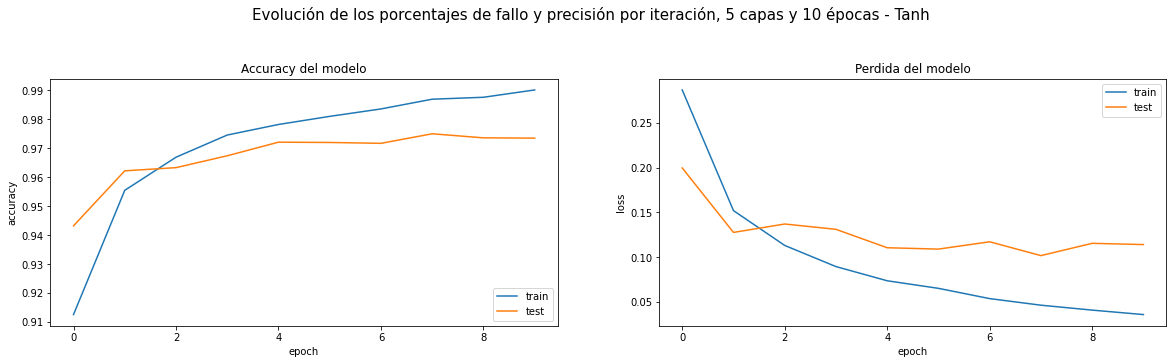

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle('Evolución de los porcentajes de fallo y precisión por iteración, 5 capas y 10 épocas - Tanh', fontsize = 15)

#Gráfico de accuracy

ax = plt.subplot(2,2, 1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Accuracy del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida. 
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

**** Para modificar puedes revisar el siguiente [recurso](https://us-lti.bbcollab.com/recording/673e3ef9f14748af859ca6aba7e43f3e)***

>**R:** Al realizar las ejecuciones del modelo con diferentes parámetros e hiperparámetros podemos notar que los resultados pueden variar respecto a las funciones de activación como también de la cantidad de capas ocultas. En este caso, durante la primera ronda de ejecuciones, con 5 capas ocultas, los resultados para las funciones de activación (ReLu, Tanh y Sigmoid) son bastante similares, en donde en los 3 casos resultó en un 97% de precisión. Posteriormente con una configuración de 10 capas y 15 capas, los resultados comienzan a variar, dependiendo del tipo de función que corresponde en cada caso. De entre las 3 funciones, la que mantuvo su precisión de forma estable en las 3 configuraciones fue Tanh, mientras que las otras 2 bajaron considerablemente, efecto que atribuimos a que la red esta siendo sobre entrenada y las funciones ReLu y Sigmoid no son capaces de seguir el paso y poder transmitir los parámetros de forma adecuada a la próxima neurona al paso de las épocas. Respecto a los tiempos de entrenamiento, las diferencias son menores, tan solo un par de segundos de diferencia, en donde aumenta en base a la cantidad de capas ocultas respectivamente.

## Parte 3. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto. 

>**R:** Backpropagation es un algoritmo que permite el calculo de derivadas, se encarga de ver cómo influye en la función de error un cambio en algún parámetro de la red y propaga los cambios hacia atrás (backward). Funciona junto con el algoritmo de optimización, ya que este último realiza las actualizaciones mediante los parámetros que han sido entregados por backpropagation previamente.

## Parte 4. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización basándose en la actividad de la semana 6 y 7, seleccionen y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items. 
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no. 

In [ ]:
#####################################################################
#Programar aquí
model1 = Sequential();
model1.add(Dense(128, input_shape=(784,), activation='relu')) # (primera capa)
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu'))

model1.add(Dense(10, activation = 'softmax')) #Arrojará la distribucion de probabilidad de las muestras
model1.compile(
    loss = 'categorical_crossentropy', #softmax requiere categorical_crossentropy 
    metrics = ['acc']
) 

model1.summary()
history1 = model1.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    validation_data = (X_test, Y_test),
    callbacks = EarlyStopping(monitor = 'val_loss', #EarlyStopping
                              mode = 'min',
                              verbose = 1,
                              patience = 5)
)
#####################################################################


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 10)               

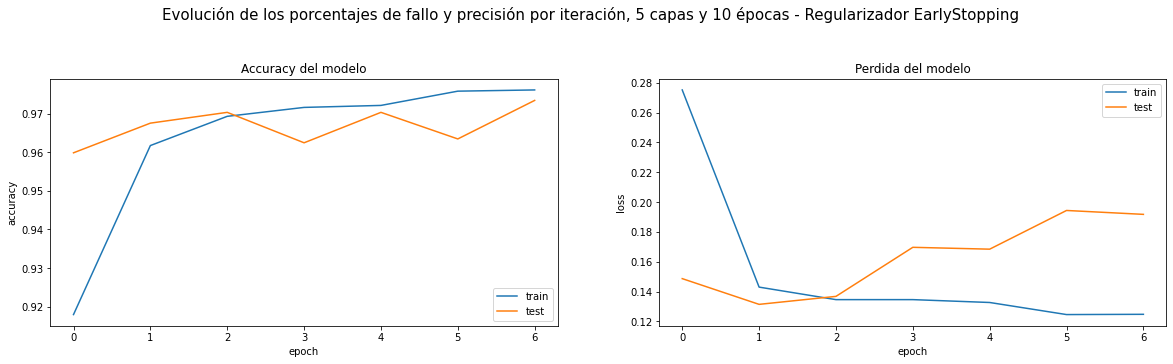

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle('Evolución de los porcentajes de fallo y precisión por iteración, 5 capas y 10 épocas - Regularizador EarlyStopping', fontsize = 15)

#Gráfico de accuracy

ax = plt.subplot(2,2, 1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Accuracy del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')

Justificar y hacer análisis aquí.

> **R:** La arquitectura de nuestro modelo finalmente quedó con el método de regularización Early Stopping, esto con el objetivo de evitar el sobreajuste en nuestro modelo. Se tomó la decisión de utilizar este método debido a los resultados que estaba entregando el modelo durante el entrenamiento, los cuales presentan una precisión alta, por ende vimos que sería **propenso** a un posible sobreajuste, pero si usabamos cualquier otra, por ejemplo dropout, estaríamos perjudicando el rendimiento de la red debido a que esta no presentaba overfitting aún. Volviendo al algoritmo seleccionado, al momento de ejecutarse, el algoritmo observa cuando ya no hay mejora en el conjunto de validación y detiene el proceso para evitar un posible incremento en la perdida, mediante esto podemos ver con cuantas épocas puede entrenarse el modelo antes de que comience a sobre ajustarse.

## Parte 5. Optimizadores y Normalización 

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar. 
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida. 

In [ ]:
#####################################################################
#Programar aquí
model1 = Sequential();
model1.add(Dense(128, input_shape=(784,), activation='relu')) # (primera capa)
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu')) 
model1.add(Dense(128, activation='relu'))

model1.add(Dense(10, activation = 'softmax')) #Arrojará la distribucion de probabilidad de las muestras

opt = keras.optimizers.Adagrad(learning_rate=0.01)

model1.compile(
    loss = 'categorical_crossentropy', #softmax requiere categorical_crossentropy 
    metrics = ['acc'],
    optimizer=opt
) 

model1.summary()
history1 = model1.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    validation_data = (X_test, Y_test),
    callbacks = EarlyStopping(monitor = 'val_loss', #EarlyStopping
                              mode = 'min',
                              verbose = 1,
                              patience = 5)
)
#####################################################################

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 10)               

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Adagrad } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ 5 capas ocultas }&\text{10 épocas}\hspace{10mm} &\text{0.9708}\hspace{10mm} {0.0976}&\text{0.9117}\hspace{10mm} {0.4466}&\text{0.4676}\hspace{10mm} {1.2572} &\text{0.9752}\hspace{10mm} {0.0318} \\
\hline
\end{array}
\end{aligned}
$$

*Especificar el nombre del optimizador

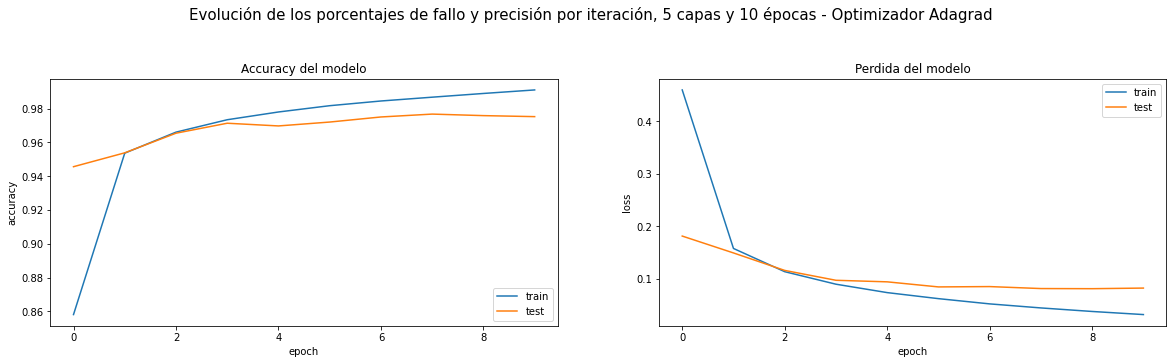

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle('Evolución de los porcentajes de fallo y precisión por iteración, 5 capas y 10 épocas - Optimizador Adagrad', fontsize = 15)

#Gráfico de accuracy

ax = plt.subplot(2,2, 1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Accuracy del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')

Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.

>**R:** Los optimizadores son una pieza fundamental dentro de nuestros modelos, ya que estos tienen como objetivo optimizar los valores de los parámetros, con el fin de reducir el error cometido dentro de la red y de esta forma entregar mejores valores durante el proceso de ejecución. La elección del optimizador adecuado para cada caso puede depender de los resultados finales e incluso del tiempo que tarda el modelo en entrenar. En cuanto a la taza de aprendizaje, si esta resulta ser pequeño, la red podría tardar más de lo normal en aprender, mientras que uno grande podría generar que la red o aprenda durante el proceso, siendo estos ejemplos de una taza de aprendizaje fija, mientras que por otro lado, una taza de aprendizaje adaptativa selecciona un learning rate adecuado e incluso lo modifica a medida que el entrenamiento avanza.

## Parte 6. Redes Convolucionales

Implementen en este apartado una nueva solución a la problemática planteada. La idea es conservar el número de neuronas, número de capas y todo lo que crean necesario, con el fin de hacer una comparación entre el resultado obtenido con MLP y ahora con una arquitectura Convolucional (CNN)

In [ ]:
#####################################################################
#Programar aquí
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#Colocar los datos en la forma correcta que ya hemos visto (1, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados (e.g. en lugar de tener como resultado una sola neurona, tendre 10 donde solo el resultado correcto sera 1 y el resto 0)
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
model2 = Sequential() # modelo

model2.add(keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu')) #32 es el numero de filtros
model2.add(keras.layers.MaxPooling2D(2,2)) # 2,2 tamaño de la matriz de agrupacion

model2.add(keras.layers.Flatten()) #Convierte el resultado de imagen cuadrada en un vector simple para las capas regulares de adelante.

model2.add(keras.layers.Dense(128, input_shape=(28,28), activation='relu'))
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(128, activation='relu'))
model2.add(keras.layers.Dense(10, activation = 'softmax')) #capa de salida regular

opt = keras.optimizers.Adagrad(learning_rate=0.01)

model2.summary()
model2.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy', #softmax requiere categorical_crossentropy 
    metrics = ['acc']
)
history2 = model2.fit(
    X_train, 
    Y_train, 
    epochs = 10, 
    validation_data = (X_test, Y_test),
    callbacks = EarlyStopping(monitor = 'val_loss', #EarlyStopping
                              mode = 'min',
                              verbose = 1,
                              patience = 5)
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_29 (Dense)            (None, 128)               692352    
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                      

$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 10 capas } & \text{10 épocas} & \text{Una capa} & \text{Matriz de (3 x 3) o 9 px.} & \text{Valor 0} & \text{Matriz de (2 x 2) o 4px.} & \text{1 pixel.} & \text{0.9848} & \text{0.0233}\\
\hline
\end{array}
\end{aligned}
$$



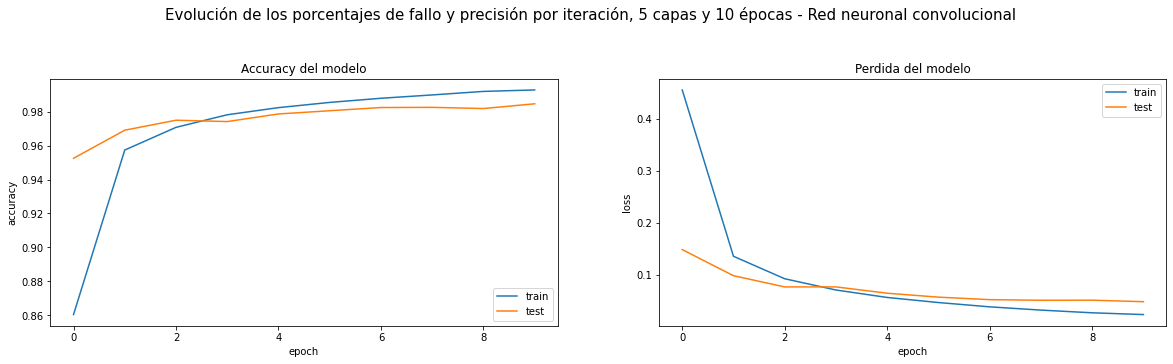

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle('Evolución de los porcentajes de fallo y precisión por iteración, 5 capas y 10 épocas - Red neuronal convolucional', fontsize = 15)

#Gráfico de accuracy

ax = plt.subplot(2,2, 1)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Accuracy del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')

Analizar aquí las diferencias entre ambas arquitecturas y modelos construídos.

>**R:** En terminos de hiperparámetros, MLP y CNN presentan una diferencia notable, ya que la primera posee una menor cantidad en comparación con la segunda, en donde esta última presenta hiperparámetros tales como el N° Kernel y su tamaño, Padding, Pooling y Stride.
La evaluación de las diferencias se basarán principalmente en el contraste del funcionamiento de cada una.

>En cuanto al rendimiento de ambos modelos, si queremos clasificar imágenes perfectamente se puede utilizar una red neuronal regular (MLP), la cual técnicamente es capaz de hacerlo, sin embargo aunque esa red clasifique imágenes de numeros, con un 97% de accuracy en nuestro caso, en realidad el porcentaje no es tan fidedigno en la práctica, ya que aunque clasifique bien las imágenes del set de datos, si le entregamos una nueva que no pertenezca a este, es muy probable que la clasifique mal, es decir, no sepa generalizar, incluso aunque le demos una imagen del set de datos, pero ajustando la figura de la imagen en una posición diferente hará que la red se confunda, solo si se parece mucho la imagen entregada a la del set de datos podrá clasificar bien. Yendo al grano, lo que le hace falta a la red neuronal multicapa es abstraer características importantes de la imagen y poder clasificar con base en ellas generando vectores que sirvan al modelo, y eso es lo que hace finalmente un CNN. 

## Parte 7. Detallar la segunda problemática de EducaDL: Redes Recurrentes Parte 1 

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Amazon. 

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Luego de implementarla, comenten qué diferencias tiene este tipo de red con una MLP a nivel de arquitectura, de parámetros, de hiperparámetros y de casos de uso. 

> **R:** Un establecimiento ubicado en la zona central de Chile, los cuales están categorizados como "clientes importantes" de EducaDL, han manifestado la idea de incorporar nuevas tecnologías al su proceso de enseñanza, utilizando como argumento a favor la facilidad y motivación que poseen los niños hoy en día frente a estas nuevas tecnologías. La solución consiste en la realización de redes neuronales recurrentes, las cuales permitan realizar analisis de sentimientos, para esto se dispone de datos de Amazon, que contienen comentarios, cada uno con una clasificación (Positivo o Negativo), el objetivo es entrenar dicha red y que esta pueda realizar predicciones a comentarios y poder clasificarlos en positivos o negativos.

In [ ]:
#####################################################################
#Programar aquí
from google.colab import drive
drive.mount('/content/drive')

#data = pd.read_csv('/content/drive/MyDrive/5_AmazonComentarios.txt', encoding='latin-1', sep=';') #Edu
data = pd.read_csv('/content/drive/MyDrive/7mo semestre/Deep Learning/5_AmazonComentarios.txt', encoding='latin-1', sep=';') #Gus
data.columns = ['calificacion', 'comentario']
data
#####################################################################

# Recuerden al final implementar predict con input de texto por teclado.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,calificacion,comentario
0,Positivo,The best soundtrack ever to anything.: I'm rea...
1,Positivo,Amazing!: This soundtrack is my favorite music...
2,Positivo,Excellent Soundtrack: I truly like this soundt...
3,Positivo,"Remember, Pull Your Jaw Off The Floor After He..."
4,Positivo,an absolute masterpiece: I am quite sure any o...
...,...,...
1448569,Negativo,Unbelievable- In a Bad Way: We bought this Tho...
1448570,Negativo,"Almost Great, Until it Broke...: My son reciev..."
1448571,Negativo,Disappointed !!!: I bought this toy for my son...
1448572,Positivo,Classic Jessica Mitford: This is a compilation...


In [ ]:
calificaciones_positivas = data[data['calificacion'] == 'Positivo']#Tomamos comentarios positivos
calificaciones_negativas = data[data['calificacion'] == 'Negativo']#y negativos por separado

muestra_parcial_positiva = calificaciones_positivas.sample(frac= 0.2) #el 20% de los comentarios positivos
muestra_parcial_negativa = calificaciones_negativas.sample(frac= 0.2) #el 20% de los comentarios negativos

muestra = pd.concat([muestra_parcial_positiva, muestra_parcial_negativa], ignore_index=True)

In [ ]:
#separando las oraciones en palabras
frase = []
for comentario in muestra['comentario']:
  palabras = (palabra.lower() for palabra in word_tokenize(comentario))
  frase.append(palabras)
num_palabras = len(frase)
print('Cantidad de palabras: ', num_palabras)

Cantidad de palabras:  289715


In [ ]:
x = muestra['comentario']
y = muestra['calificacion']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, shuffle=True, random_state=42)

In [ ]:
#tokenizando las palabras y separando en dimensiones iguales
tokenizer = Tokenizer(num_palabras)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen = 120, truncating='post', padding='post')

In [ ]:
x_train[0], len(x_train[0])

(array([   34,   999,   979,   300,     8,   166,    13,  5986,    52,
          714,     3,   473,    12,    13,   253,     6,     1,  5765,
           16,     1,   166,   240,     9,   395,   979,    11,     4,
           29,   577,     6,     1,   166,    15,  1396,   231,    17,
            4,  1358, 38016,   129,     5,   707,    34,   168,    66,
            7,    11,    21,    30,     1,  1882,     6,     4,  1453,
        22492,    15,    20,     5, 11515,    56,    18,   129,     5,
         1485,    72,    37,    15,    55, 45061, 14491,     9,   217,
            5,     4,   340,    16,   118,  1901,    78,   308,    37,
          583,  1788,    78,   125,  1788,     6,   190,    16,  6911,
            2, 13416,     3,    13,    30,   202,   367,   895,    18,
            1,  2956,    34,   999,   257,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0], dtype=int32), 120)

In [ ]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen = 120, truncating='post', padding='post')

In [ ]:
x_test[0], len(x_test[0])

(array([   14,     1,  1081,  2014,  5482,     3,   157,   296,    77,
           20,     5,   577,    17,     8,  3165,  2014,  5482,   147,
          230,    18,   129,   202,     6,     8,     3,   134,    21,
          439,   601,   964,    56,   634,  7024,   839,    77,    20,
         2237, 21407,     2,   899,   712,     3,    48,     5,    85,
            1,   135,   139,     5,    55,     1,  1081,  2014,  5482,
            6,   128,  2831,    65,    85,  5098,  3190,  2103,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0], dtype=int32), 120)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
model3 = Sequential()

model3.add(keras.Input(shape=(120, 1)))
model3.add(
  keras.layers.Bidirectional(
      keras.layers.LSTM(20, activation = 'tanh')
      ) 
  )
  
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))
opt = keras.optimizers.Adagrad(learning_rate=0.1)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 40)               3520      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3622/3622 [==============================] - 281s 76ms/step - loss: 0.6787 - acc: 0.5665 - val_loss: 0.6653 - val_acc: 0.5945
Epoch 2/2
3622/3622 [==============================] - 274s 76ms/step - loss: 0.6550 - acc: 0.6032 - val_loss: 0.6473 - val_acc: 0.6139


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 2 capas } & \text{1 épocas} & \text{64} & \text{Ninguna} & \text{Adagrad}  & \text{Sigmoid} & \text{0.6139} & \text{0.6550}\\
\hline
\end{array}
\end{aligned}
$$



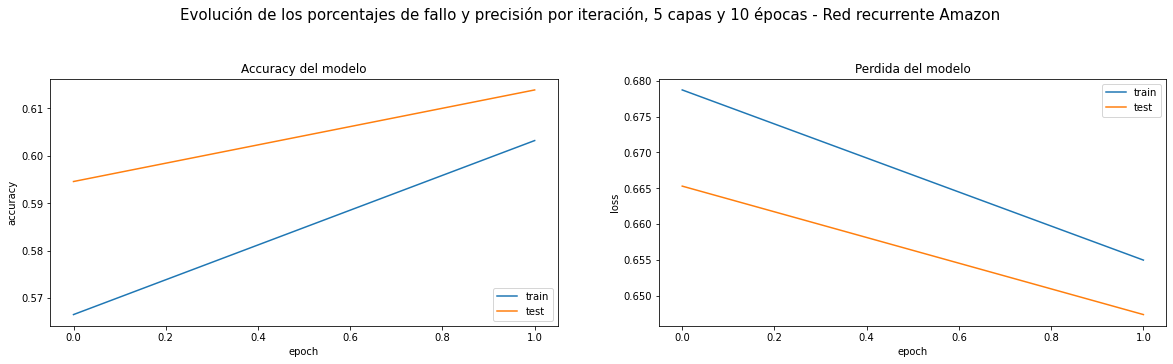

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle('Evolución de los porcentajes de fallo y precisión por iteración, 5 capas y 10 épocas - Red recurrente Amazon', fontsize = 15)

#Gráfico de accuracy

ax = plt.subplot(2,2, 1)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Accuracy del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')

Escribir análisis aquí.

> **R:** Lo que se realizó en el análisis de sentimientos de Amazon fue básicamente la selección de una muestra del conjunto de datos original, luego usando algunas librerías como word_tokenize creamos por cada comentario de la muestra un array que contendría la frase desglosada en palabras. Posteriormente, separamos el conjunto train y test, luego se tokenizaron las frases del conjunto x_train y x_test mientras que al conjunto "Y" le hacemos un label encoder. Posterior a esto solo queda pasarlo a un modelo, el cual se escogió una red neuronal recurrente LTSM bidireccional, a la cual le pasamos por parámetros 20 neuronas por capa bidireccional, una función de activación tanh y una función de salida sigmoide porque estas suelen trabajar bastante bien juntas, además de ser las que mejor resultado mostraron al entrenar la red, luego le asignamos un optimizador Adagrad con un learning rate aumentado hasta 0.1. Finalmente, como es un modelo de clasificación binaria, 0 o 1, le asignamos binary_crossentropy al loss. Esta red se entrenó por 1 época debido a que no había mejoría del val_acc al paso de las épocas, solo lograba aumentar el val_loss. Le asignamos un batch_size de 64 y validamos el acc con el conjunto test.

> MLP está diseñado con el objetivo de trabajar en la clasificación de imágenes, tal y como estamos trabajando actualmente con el dataset de MNIST, mientras que por otro lado, RNN está diseñado para trabajar con secuencias, como secuencias de palabras en una oración, como lo hemos trabajado con los datos de comentarios de Amazon.


## Parte 8.  Detallar la tercera problemática de EducaDL: Redes Recurrentes Parte 2.

Detallar aquí cuál es la problemática que presenta la organización de acuerdo al caso planteado. Analicen el contexto del problema y los datos de Twitter.

Indiquen en qué consiste la solución planteada detallando sobretodo el uso de las redes Recurrentes. También, cómo lograron conseguir el máximo accuracy. Registren los valores en la tabla dispuesta a continuación.

Analicen el impacto de este tipo de solución, basándose en el estado del arte y en el campo de análisis de sentimiento y procesamiento de lenguaje natural en deep learning.
 

>**R:** Al igual como vimos en el punto anterior, la solución propuesta consiste en redes neuronales recurrentes, las cuales permitan realizar analisis de sentimientos, utilizando en este caso datos de comentarios de Twitter, cada uno con una clasificación (Positivo o Negativo), para así poder realizar una predicción a futuros comentarios y clasificarlos.

In [ ]:
#####################################################################
#Programar aquí
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/7mo semestre/Deep Learning/2_TweetsClasificacion_EX3.txt', sep=';', encoding='latin-1') #Gus
#data = pd.read_csv('/content/drive/MyDrive/Deep Learning/2_TweetsClasificacion_EX3.txt', sep=';', encoding='latin-1') #Edu
data.columns = ['calificacion', 'comentario']
data
#####################################################################

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,calificacion,comentario
0,Positivo,im meeting up with one of my besties tonight! ...
1,Positivo,"Thanks for the Twitter add, Sunisa! I got to m..."
2,Positivo,Being sick can be really cheap when it hurts t...
3,Positivo,he has that effect on everyone
4,Positivo,You can tell him that I just burst out laughin...
...,...,...
1599992,Negativo,Tried to get the mutant Fawkes to follow me bu...
1599993,Negativo,Sick Spending my day laying in bed listening ...
1599994,Negativo,Gmail is down?
1599995,Negativo,rest in peace Farrah! So sad


In [ ]:
calificaciones_positivas = data[data['calificacion'] == 'Positivo']#Tomamos comentarios positivos
calificaciones_negativas = data[data['calificacion'] == 'Negativo']#y negativos por separado

muestra_parcial_positiva = calificaciones_positivas.sample(frac= 0.2) #el 20% de los comentarios positivos
muestra_parcial_negativa = calificaciones_negativas.sample(frac= 0.2) #el 20% de los comentarios negativos

muestra = pd.concat([muestra_parcial_positiva, muestra_parcial_negativa], ignore_index=True)

In [ ]:
#separando las oraciones en palabras
frase = []
for comentario in muestra['comentario']:
  palabras = (palabra.lower() for palabra in word_tokenize(comentario))
  frase.append(palabras)
num_palabras = len(frase)
print('Cantidad de palabras: ', num_palabras)

Cantidad de palabras:  320000


In [ ]:
x = muestra['comentario']
y = muestra['calificacion']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, shuffle=True, random_state=42)

In [ ]:
#tokenizando las palabras y separando en dimensiones iguales
tokenizer = Tokenizer(num_palabras)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen = 120, truncating='post', padding='post')

In [ ]:
x_train[0], len(x_train[0])

(array([  566,     1,    65,    89,   371,    50,    86,     1,   982,
           10,    96,   531, 40854,     4,   146,    19,    20,  2989,
            2,    22,     4,   136,    14,    27,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0], dtype=int32), 120)

In [ ]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen = 120, truncating='post', padding='post')

In [ ]:
x_test[0], len(x_test[0])

(array([   1,   33,    2,  118,   10,    5,  139,   11,    3,  174,   50,
          10,  662,    1,   46,  176,   81, 7187, 8204,   20,   62, 6022,
           6,  143,    4,  466,  709,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int32), 120)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
model4 = Sequential()

model4.add(keras.Input(shape=(120, 1)))
model4.add(
  keras.layers.Bidirectional(
      keras.layers.LSTM(20, activation = 'tanh')
      ) 
  )
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))
opt = keras.optimizers.Adagrad(learning_rate=0.1)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 40)               3520      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
4000/4000 [==============================] - 214s 53ms/step - loss: 0.6804 - acc: 0.5682 - val_loss: 0.6788 - val_acc: 0.5749
Epoch 2/2
4000/4000 [==============================] - 210s 52ms/step - loss: 0.6792 - acc: 0.5708 - val_loss: 0.6778 - val_acc: 0.5785


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.5. Mejor resultado con Recurrente Twitter }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 2 capas } & \text{1 épocas} & \text{64} & \text{Ninguna} & \text{Adagrad}  & \text{Sigmoid} & \text{0.5714} & \text{0.6806}\\
\hline
\end{array}
\end{aligned}
$$



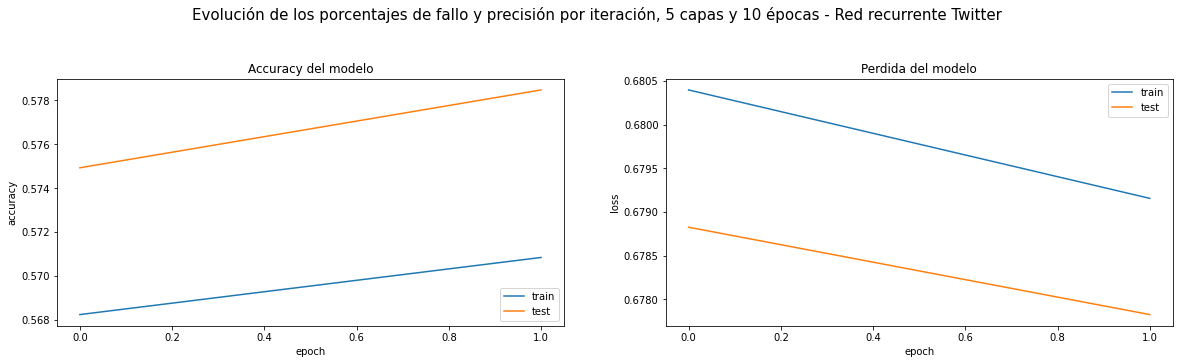

In [ ]:
plt.figure(figsize=(20, 10))

plt.suptitle('Evolución de los porcentajes de fallo y precisión por iteración, 5 capas y 10 épocas - Red recurrente Twitter', fontsize = 15)

#Gráfico de accuracy

ax = plt.subplot(2,2, 1)
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('Accuracy del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Gráfico de perdida

ax = plt.subplot(2,2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')

Ingresar análisis de lo realizado aquí, detallando el ajuste realizado, las técnicas utilizadas, funciones, optimizadores, normalización, etc. Fundamentar cómo fue que alcanzaron el máximo Accuracy y disminuyeron el Loss.

>**R:** Lo que se realizó en el análisis de sentimientos de Twitter fue básicamente la selección de una muestra del conjunto de datos original, luego usando algunas librerías como word_tokenize creamos por cada comentario de la muestra un array que contendría la frase desglosada en palabras. Posteriormente, separamos el conjunto train y test, luego se tokenizaron las frases del conjunto x_train y x_test mientras que al conjunto "Y" le hacemos un label encoder. Posterior a esto solo queda pasarlo a un modelo, el cual se escogió una red neuronal recurrente LTSM bidireccional, a la cual le pasamos por parámetros 20 neuronas por capa bidireccional, una función de activación tanh y una función de salida sigmoide porque estas suelen trabajar bastante bien juntas, además de ser las que mejor resultado mostraron al entrenar la red, luego le asignamos un optimizador Adagrad con un learning rate aumentado hasta 0.1. Finalmente, como es un modelo de clasificación binaria, 0 o 1, le asignamos binary_crossentropy al loss. Esta red se entrenó por 1 época debido a que no había mejoría del val_acc al paso de las épocas, solo lograba aumentar el val_loss. Le asignamos un batch_size de 64 y validamos el acc con el conjunto test.

## Parte 9. Implementación Arquitecturas Especializadas

Fundamentar detalladamente en este apartado cómo podríamos generar una solución para EducaDL, considerando el uso de redes especializadas. De este apartado depende un futuro proyecto, por lo que recuerden especificarlo bien y considerar todos los detalles necesarios considerando tecnología, beneficios, problema a resolver, contexto socio-cultural, etc.


Haciendo un breve repaso de la problemática, EducaDL necesitaba un experto de aprendizaje automático para crear un modelo experimental que ayudará al aprendizaje de niños de prebásica. 

Recordando brevemente la problemática, la empresa EducaDL tiene la necesidad de contratar a un experto en aprendizaje automático, para poder generar un modelo experimental que ayude con el aprendizaje de niños de prebásica relacionado específicamente con el apoyo de aprendizaje de números. Para esto hemos tomado en cuenta 3 redes neuronales especializadas, perceptrón multicapa, redes neuronales convolucionales y redes neuronales recurrentes. Haciendo énfasis en que este proyecto va enfocado en fomentar la enseñanza de los números a niños, vamos a comenzar con la red neuronal más básica de las 3.

El perceptrón multicapa, si queremos clasificar imágenes de números se puede utilizar perfectamente, es una red que técnicamente es capaz de hacerlo y entregar buenos resultados, como pudimos ver en nuestro ejemplo desarrollado. Hablando acerca del tiempo y el costo de la realización del proyecto en base a esta técnica, es mucho menor que las otras 2 opciones y sería una ventaja para el cliente, sin embargo, si lo llevamos a la práctica, puede que este modelo no sea tan fidedigno, pero esto lo veremos más adelante al contrastarlo con su mayor rival.

Tras haberlo referenciado, ahora hablaremos del otro posible modelo para desarrollar la solución para EducaDL, las redes neuronales convolucionales. Esta red desempeña un papel muy similar al modelo descrito anteriormente, ya que también se encarga de clasificar imágenes, pero esta trabaja diferente que la red neuronal regular, esta se encarga de, mediante capas de convolución, generar X número de imágenes con diferentes filtros de esta, la cual posteriormente serán entregadas a una capa de agrupación, la cual abstraerá características de las imágenes con filtro. ¿Y cómo se diferencia entonces esta red de el perceptrón multicapa? Para explicarlo mejor, utilizaremos un ejemplo, si le entregas una imágen a un perceptrón multicapa, trabajará los píxeles de manera individual, como si fueran estas características independientes de la imagen, esto causaría que si se cambiara un poco la imagen de posición o de tamaño, la red neuronal tenderá a confundirse y para solucionar esto habría que entregarle cantidades inmensas de ejemplos a la red. Entonces, en el caso de que un niño estuviese aprendiendo a escribir números o realizar operaciones, el modelo no sería 100% eficaz, debido a que la escritura de los niños es muy irregular y no siempre sería igual, por lo que el perceptrón multicapa no sabría clasificar correctamente lo realizado por el infante, en cambio, la red neuronal convolucional si trabajaría eficientemente, debido a que esta se encarga de extraer primero las características de la imagen y dejar de depender de la posición y del tamaño de la imagen. Entonces, en este punto no es tan factible utilizar el perceptrón multicapa, debido a que si queremos que sea viable este método, necesitamos cantidades masivas de datos y ni así podríamos asegurar que este sea capaz de discriminar las entradas, por lo que sería riesgoso invertir este proyecto con la incertidumbre de no tener los datos suficientes para entrenar el modelo y ni teniendolos tener asegurado el éxito del proyecto.

Entonces, con lo mencionado anteriormente, por ahora nuestra primera opción para la solución serían las redes neuronales convolucionales, debido a que aunque su desarrollo e implementación pueda ser más extensa y costosa, nos darían una mayor probabilidad de éxito y nos ahorraría el proceso de obtención masiva de datos elcual puede resultar incluso más tardado que la realización de la red convolucional.

Para el segundo problema de EducaDL busca un modelo capaz de analizar las evaluaciones a sus docentes con los comentarios que realizan los apoderados de la institución mediante una red neuronal recurrente. La naturaleza de esta red le permite encargarse del procesamiento del lenguaje natural o predecir características cronológicas para analizar datos de series temporales. En nuestro caso, nosotros hemos trabajado con una red recurrente bidireccional, la cual, nos permite efectuar un análisis de los sentimientos de los comentarios entregados a través del dataset de Amazon. Este algoritmo en particular nos permite saber tanto del pasado como del futuro y predecir mejor la oración que se le está entregando. Con esto podremos crear una solución mucho más sólida y confiable para evaluar los comentarios de los apoderados y asignar las respectivas evaluaciones a los docentes. Ahora, el modelo construido fue entrenado con dos épocas, esto debido al costo computacional de la red, esto sumado con que la plataforma de pruebas Google Colab, se suele saturar rápido la RAM. Pero aunque el modelo haya entregado un 61% de precisión, es decir, solo 11% lejos del azar, si se fijan en el gráfico el modelo sigue aprendiendo al pasar las épocas. Esto nos llevó a probar con 15 épocas de entrenamiento (las cuales no se pudieron llevar a cabo por el exceso de uso de RAM) en la época 11, mostró una mejoría considerable de 72% de precisión, y la perdida seguía bajando aún más, cual nos indica que este modelo, con las debidas épocas de entrenamiento es totalmente capaz de entregar una solución a EducaDL.

El caso de la tercer problemática de EducaDL, es decir, la implementación de una red social parecida a Twitter, en donde se registren miembros de la sociedad educativa para acoger nuevas iniciativas, tiene por solución el mismo modelo que la anterior, un RNN Bidireccional el cual está trabajando con dos épocas, solo para probar si el modelo es capaz de predecir correctamente, este a diferencia del anterior tiene un poco menos, alrededor de un 57% de precisión, pero ese no es el límite del modelo, al igual que el anterior los gráficos reflejan que el modelo al cursar un mayor número de épocas será capaz de predecir con una alta precisión si las sugerencias son buenas o malas. Así que EducaDL puede trabajar perfectamente con este modelo una vez se haya entrenado con el número pertinente de datos y épocas.

